In [36]:
import csv 
import pandas as pd
import numpy as np
from operator import index

#for visualization
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.style.use('fivethirtyeight')

#for modeling 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})


In [ ]:
df = pd.read_csv('test.csv', skip_blank_lines = True) # reads the specified datafile

df.drop(df.columns.difference(["Process Name","Device ID","Build Mode","Align MA0", "Align MA1", "Align MA2", "Align MA3", "Align MA4", "Align VX", "Align VY", "Result"]), axis = 1, inplace = True)
# ^removes all columns except those specified

df['Result'] = df['Result'].replace(to_replace=['FAIL', 'PASS'], value = [0, 1]) # changes 'PASS' values to 1 and 'FAIL' values to 0 


fv = str(input("Enter Process Name: ")) 
fv2 = str(input("Input first 4-digits of Device ID: "))
fv3 = int(input("Enter numer of 'Build Mode' exlusions: "))
# takes operator input here ^

if fv and fv2 == '':  # if nothing is entered program continues
    pass

exclusions = []

if fv3 != 0:   # if there >0 exlusions entered then program loops the number entered
    for x in range(fv3):
        exclusion = str(input("Enter exclusion: "))
        df = df[df["Build Mode"].str.contains(exclusion)==False] # removes rows under Build Mode based on input values if needed
else:
    pass


df = df[df["Process Name"].str.contains(fv)==True] # only keeps cells that match 'Process Name' entered
df = df[df["Device ID"].str.contains(fv2)==True] # only keeps cells that match 'Device ID' entered
df = df.dropna() # drops null values
df = df.drop_duplicates(subset = ['Process Name', 'Device ID', 'Build Mode', 'Result'], keep = 'last') # drops duplicates w/n these columns

print(df.iloc[0:50]) # should actually save this using df = df.iloc[0:50] which would limit it to 50 rows
# print(df) # prints what the datafile would look like

df.to_csv('modified.csv', index=False) # saves it to a new csv file titles 'modified'


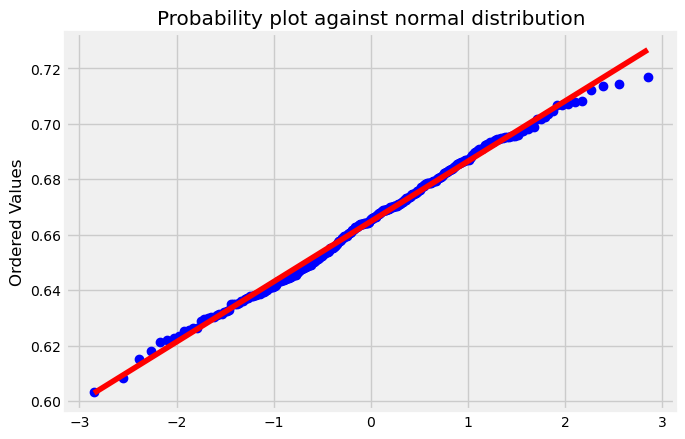

In [38]:
# Test normality of data distribution
fig = plt.figure()
ax1 = fig.add_subplot(111) # 111 is equivalent to nrows=1, ncols=1, plot_number=1.
prob = stats.probplot(df['Align MA0'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probability plot against normal distribution')
plt.show()

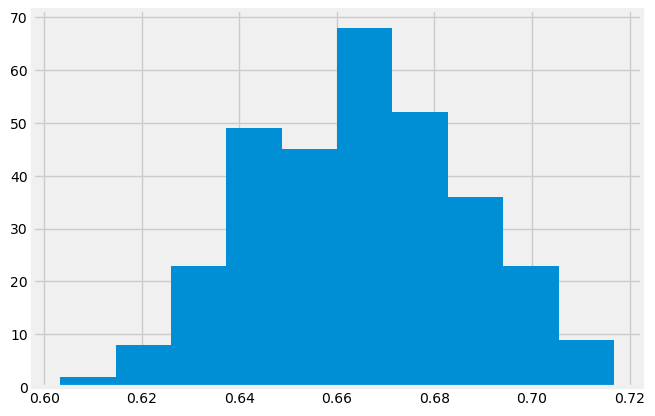

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot = plt.hist(df['Align MA0']) # produces histogram
plt.show()

In [40]:
# Anderson-Darling test test if a sample from a population follows a particular distribution
stats.anderson(df['Align MA0'], dist = 'norm') # to test if the sample is normally distributed
# If the statistic value is less than the 5% critical value than the data is normally distributed

AndersonResult(statistic=0.4453206282073552, critical_values=array([0.569, 0.648, 0.777, 0.907, 1.079]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [41]:
stats.normaltest(df['Align MA0']) # performs a normality test

NormaltestResult(statistic=4.27455542391132, pvalue=0.11797556975149552)

In [42]:
x = df['Align MA0']
# define Cp Index
def Cp(x, usl, lsl):
    sigma = x.std()
    Cp = (usl - lsl) / (6 * sigma)
    return Cp

In [43]:
# Define Cpk Index
def Cpk(x, usl, lsl):
    sigma = x.std()
    m = x.mean()
    Cpu = (usl - m) / (3 * sigma)
    Cpl = (m - lsl) / (3* sigma)
    Cpk = np.min([Cpu, Cpl])
    return Cpk

In [44]:
# defne specification limit
usl = float(input('What is the upper specification?: '))
lsl =  float(input('What is the lower specification?: '))

What is the upper specification?: .8
What is the lower specification?: .6


In [45]:
# Calculate Cp value
Cp = Cp(x, usl, lsl)
print("Cp is: ", Cp)

Cp is:  1.5393480798447206


In [46]:
# Calculate Cpk value
Cpk = Cpk(x, usl, lsl)
print("Cpk is: ", Cpk)

Cpk is:  0.9975464239323883


In [47]:
# find value of Cpu
sigma = x.std()
m = x.mean()
Cpu = (usl - m) / (3 * sigma)
print("Cpu is: ", Cpu)

Cpu is:  2.0811497357570525


In [48]:
# find value of Cpl
Cpl = (m - lsl) / (3* sigma)
print("Cpl is: ", Cpl)

Cpl is:  0.9975464239323883


<AxesSubplot:title={'center':'Box Plot w/ Pandas'}>

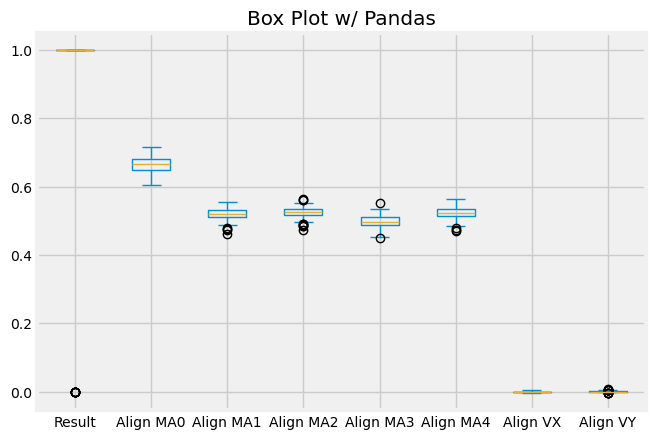

In [49]:
df.plot.box(title = "Box Plot w/ Pandas") # returns all data columns as boxplot information 

Text(0.5, 1.0, 'Simple Boxplot')

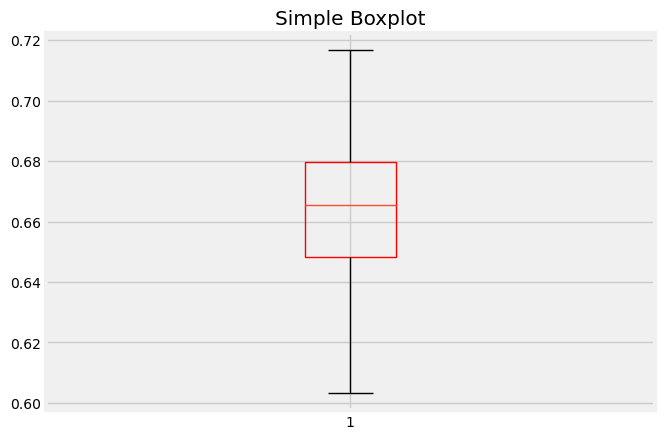

In [50]:
plt.boxplot(df['Align MA0'], boxprops=dict(color='red')) # returns only specified column as boxplot info
plt.title('Simple Boxplot')

In [ ]:
print(df.describe(include = 'all')) # gives descriptive statistics of parsed datafile info